# Import packages

In [2]:
%matplotlib inline

In [14]:
# system
import os
import sys

# standard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading .bmp files - failed
from scipy import misc

# skimage
from skimage import io
from skimage import filters

# morphological filters
from skimage.morphology import disk
from skimage.morphology import erosion, dilation, opening, closing

# multiple thresholding with Otsu threshold
from skimage.filters import threshold_multiotsu

# preprocessing filters
from skimage.filters import median, sato, meijering, frangi, hessian


In [15]:
# custom imports
from custom_metrics import dice_coef, dice_coef_multilabel

In [16]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 10), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

# Load Images and Masks

In [17]:
FOLDER_PATH = '../papsmear-data/normal_columnar'

In [18]:
# file names: all, images, masks

file_names = sorted(os.listdir(FOLDER_PATH))
img_names = sorted([s for s in file_names if '-d' not in s])
mask_names = sorted([s for s in file_names if '-d' in s ])

# no intersection there
assert len( set(mask_names).intersection(set(img_names)) ) == 0

In [19]:
# patient ids (indexes)
idxs = sorted([name.split('.')[0] for name in img_names])

# Iterative file-reading in pairs

In [20]:
#print('Image Shape', ' '*(15 - len('Image Shape')), '| Mask Shape')
#print(30 * '-')

for idx in idxs:
    
    # make indexes into file names
    img_name = idx + '.BMP'
    mask_name = idx + '-d.bmp'
    
    # read off a pair
    img = io.imread(os.path.join(FOLDER_PATH, img_name))
    mask = io.imread(os.path.join(FOLDER_PATH, mask_name))[:, :, 2]
    
    # check the shape correspondance
    assert img.shape[:2] == mask.shape[:2]
    
    # print shapes
    # print(img.shape, ' '*(15 - len(str(img.shape))), '|', mask.shape)

# Read an Image/Mask pair

In [21]:
idx1 = '153956040-153956058-001'

# make indexes into file names
img_name = idx1 + '.BMP'
mask_name = idx1 + '-d.bmp'

img1 = io.imread(os.path.join(FOLDER_PATH, img_name))
mask1 = io.imread(os.path.join(FOLDER_PATH, mask_name))[:, :, 2]

mask1[mask1 == 0] = 0
mask1[mask1 == 128] = 1
mask1[mask1 == 255] = 2

# Work with image in gray scale now

In [22]:
gray1 = img1.mean(-1)

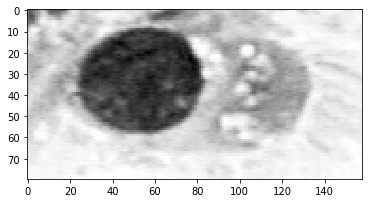

In [23]:
plt.imshow(gray1, cmap='gray')

**Median filter can help to reduce noise.**

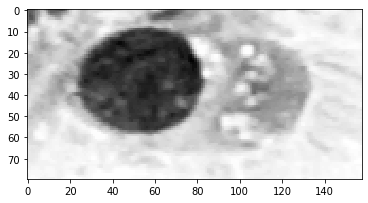

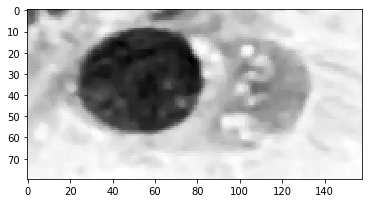

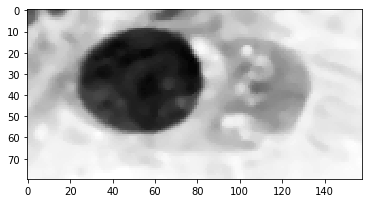

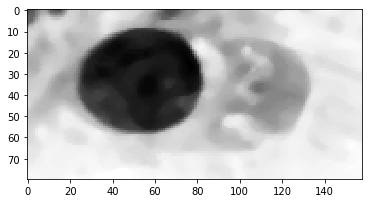

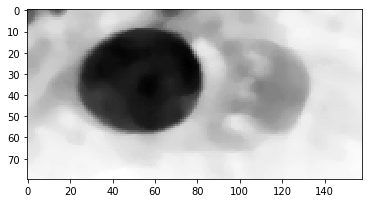

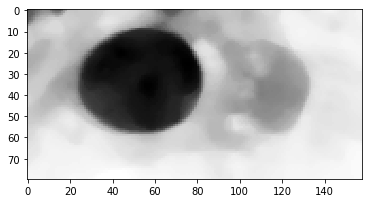

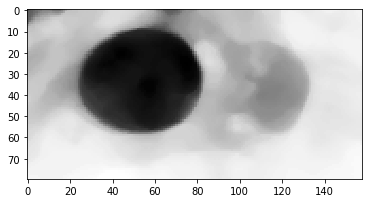

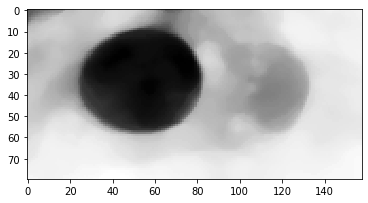

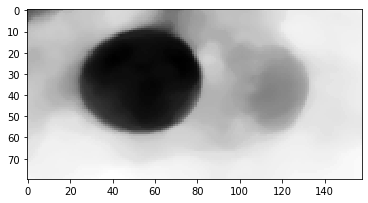

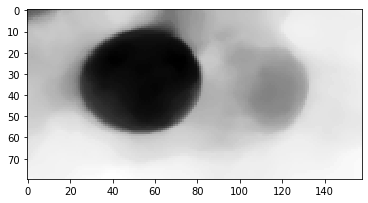

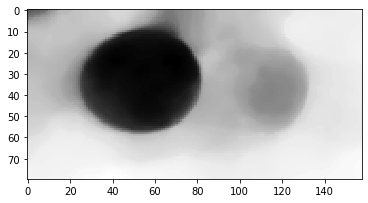

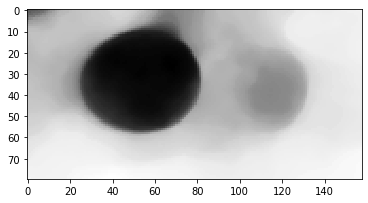

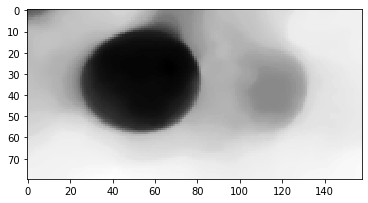

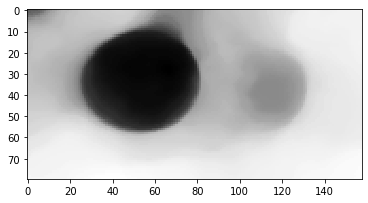

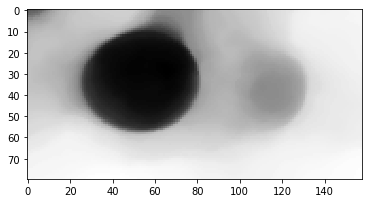

In [24]:
for d in range(1, 16):
    gray1_med = median(gray1, disk(d))
    plt.imshow(gray1_med, cmap='gray')
    plt.show()

In [25]:
gray1_med = median(gray1, disk(5))

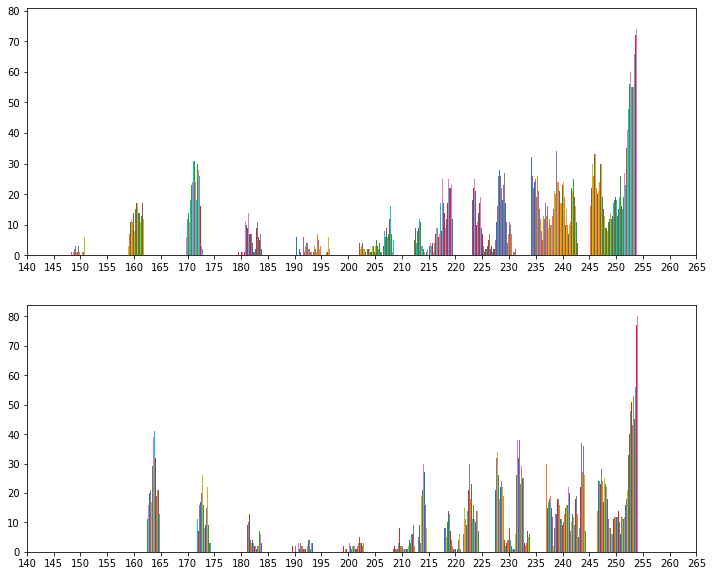

In [26]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

axs[0].hist(gray1)
axs[0].set_xticks(range(140, 270, 5))

axs[1].hist(gray1_med)
axs[1].set_xticks(range(140, 270, 5))

fig.show()

# Methods from Lecture 1

## Desired Output

Channel 2 (chose to sork with it)


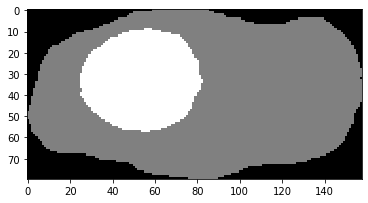

In [27]:
print('Channel 2 (chose to sork with it)')
plt.imshow(mask1, cmap='gray')
plt.show()

### Assign binary masks for the 3 labels

In [28]:
nucleus = (mask1 == 2)
cytoplasm = (mask1 == 1)
background = (mask1 == 0)

Black Nucleus


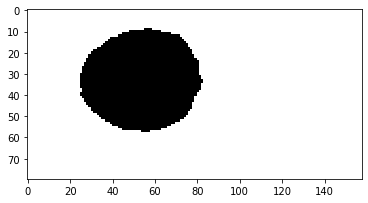

In [29]:
print('Black Nucleus')
plt.imshow(~nucleus, cmap='gray')
plt.show()

Black Cytoplasm


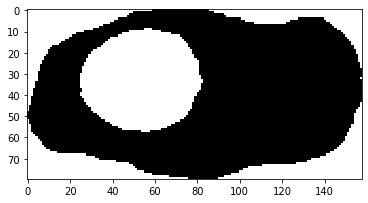

In [30]:
print('Black Cytoplasm')
plt.imshow(~cytoplasm, cmap='gray')
plt.show()

Black Background


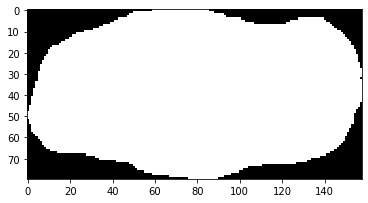

In [31]:
print('Black Background')
plt.imshow(~background, cmap='gray')
plt.show()

## Otsu thresholding

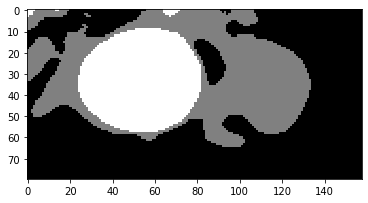

In [32]:
# Applying multi-Otsu threshold for the default value, generating three classes.
thresholds = threshold_multiotsu(gray1_med)

# Using the threshold values, we generate the three regions.
regions = np.digitize(gray1_med, bins=thresholds)

plt.imshow(~regions, cmap='gray')

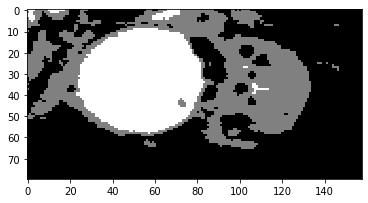

In [33]:
# Applying multi-Otsu threshold for the default value, generating three classes.
thresholds = threshold_multiotsu(gray1)

# Using the threshold values, we generate the three regions.
regions = np.digitize(gray1, bins=thresholds)

plt.imshow(~regions, cmap='gray')

### Nucleus

In [34]:
nucleus_pred = (regions == 0)

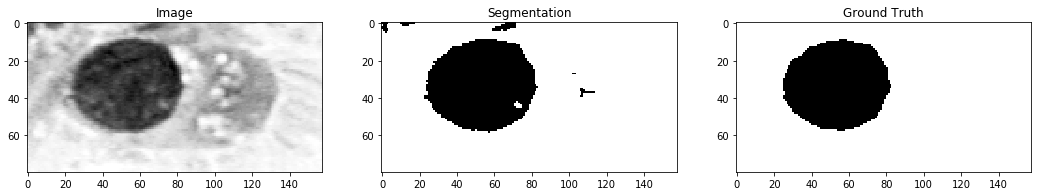

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.imshow(gray1, cmap='gray')
ax1.set_title('Image')

ax2.imshow(~nucleus_pred, cmap='gray')
ax2.set_title('Segmentation')

ax3.imshow(~nucleus, cmap='gray')
ax3.set_title('Ground Truth')

plt.show()

In [36]:
dice_coef(nucleus_pred, nucleus)

0.9522752507819034

### Cytoplasm

In [37]:
cytoplasm_pred = (regions == 1)

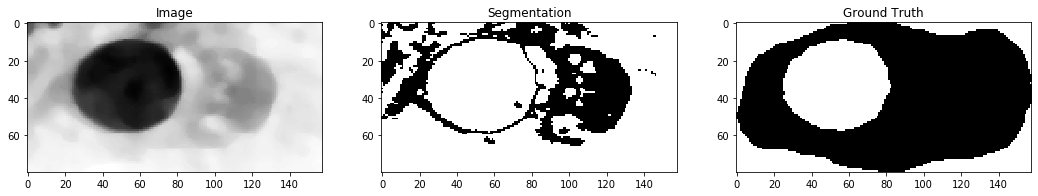

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.imshow(gray1_med, cmap='gray')
ax1.set_title('Image')

ax2.imshow(~cytoplasm_pred, cmap='gray')
ax2.set_title('Segmentation')

ax3.imshow(~cytoplasm, cmap='gray')
ax3.set_title('Ground Truth')

plt.show()

In [39]:
dice_coef(cytoplasm_pred, cytoplasm)

0.5080310457676318

### Background

In [40]:
background_pred = (regions == 2)

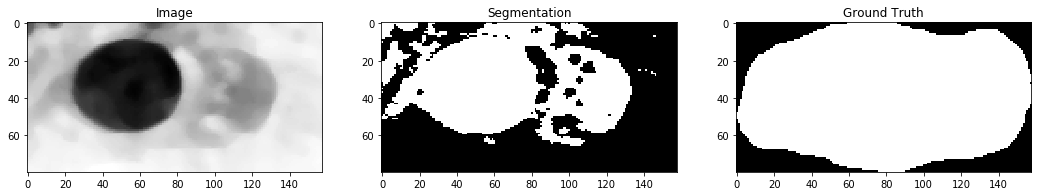

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.imshow(gray1_med, cmap='gray')
ax1.set_title('Image')

ax2.imshow(~background_pred, cmap='gray')
ax2.set_title('Segmentation')

ax3.imshow(~background, cmap='gray')
ax3.set_title('Ground Truth')

plt.show()

In [42]:
dice_coef(background_pred, background)

0.453729501147947

## All together

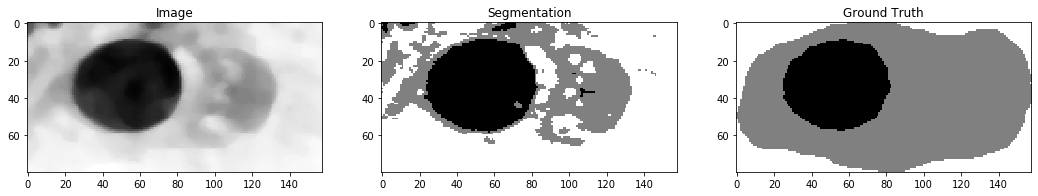

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.imshow(gray1_med, cmap='gray')
ax1.set_title('Image')

ax2.imshow(regions, cmap='gray')
ax2.set_title('Segmentation')

ax3.imshow(~mask1, cmap='gray')
ax3.set_title('Ground Truth')

plt.show()

**Closing might help.**

# Convert into a format for assessing the performance

In [44]:
mask1_channeled = np.stack([nucleus, cytoplasm, background], axis=-1)
mask1_channeled = np.expand_dims(mask1_channeled, axis=0)

mask1_pred_channeled = np.stack([nucleus_pred, cytoplasm_pred, background_pred], axis=-1)
mask1_pred_channeled = np.expand_dims(mask1_pred_channeled, axis=0)

In [45]:
# check dimentions (should be): (batch/index of image, height, width, class_map)
mask1_channeled.shape, mask1_pred_channeled.shape

((1, 80, 158, 3), (1, 80, 158, 3))

In [46]:
dice_coef_multilabel(y_true=mask1_channeled, y_pred=mask1_pred_channeled, numLabels=3)

array([0.95227525, 0.50803105, 0.4537295 ])

# Try the same thresholds on multiple images

In [47]:
# Read off images and masks

imgs_list = []
masks_list = []

for idx in idxs:
    
    # make indexes into file names
    img_name = idx + '.BMP'
    mask_name = idx + '-d.bmp'
    
    # read off a pair (only second channel is informative for a mask)
    img = io.imread(os.path.join(FOLDER_PATH, img_name))
    mask = io.imread(os.path.join(FOLDER_PATH, mask_name))[:, :, 2]
    
    
    # change values - needed for k-means later
    mask[mask == 0] = 0
    mask[mask == 128] = 1
    mask[mask == 255] = 2
    
    # check the shape correspondance
    assert img.shape[:2] == mask.shape[:2]
    
    imgs_list.append(img)
    masks_list.append(mask)
    
print(len(imgs_list), len(masks_list))

98 98


In [48]:
def preprocess_images(filter_name):

    # preprocess:
    #     - list of (images to gray scale + filter of choice)
    #     - list of masks into 3*hight*width arrays

    # store as lists since the dimentions of images and masks vary, so we can't store them in np.arrays
    
    assert filter_name in ['sato', 'meijering', 'frangi', 'hessian']
    
    # images
    gray_list = []
    for i in range(len(imgs_list)):
        img = imgs_list[i]
        img = img.mean(-1) # avarage to gray-scale
        
        # apply a filter
        if filter_name == 'sato':
            img = sato(img)
        elif filter_name == 'meijering':
            img = meijering(img)
        elif filter_name == 'frangi':
            img = frangi(img)
        else:
            img = hessian(img, black_ridges=False)

        gray_list.append(img)


    # masks
    masks_3channels_list = []
    for i in range(len(masks_list)):
        mask = masks_list[i]

        # avarage to gray-scale
        nucleus = (mask == 2)
        cytoplasm = (mask == 1)
        background = (mask == 0)

        mask_channeled = np.stack([nucleus, cytoplasm, background], axis=-1)
        mask_channeled = np.expand_dims(mask_channeled, axis=0) # need to use the multilabel dice score function

        masks_3channels_list.append(mask_channeled)

    print(len(masks_3channels_list))
    print(masks_3channels_list[0].shape)
    
    return gray_list, masks_3channels_list

In [56]:
# # test
gray_list, masks_3channels_list = preprocess_images('sato')
# gray_list, masks_3channels_list = preprocess_images('meijering')
# gray_list, masks_3channels_list = preprocess_images('frangi')
# gray_list, masks_3channels_list = preprocess_images('hessian')

98
(1, 80, 158, 3)


In [57]:
def segment_with_otsu(gray_list):

    # segment images with otsu-calculated threshholds
    seg_3channels_list = []

    for gray_img in gray_list:

        # Applying multi-Otsu threshold for the default value, generating three classes.
        thresholds = threshold_multiotsu(gray_img)
        regions = np.digitize(gray_img, bins=thresholds)


        nucleus_pred = (regions == 0)
        cytoplasm_pred = (regions == 1)
        background_pred = (regions == 2)

        seg_channeled = np.stack([nucleus_pred, cytoplasm_pred, background_pred], axis=-1)
        seg_channeled = np.expand_dims(seg_channeled, axis=0) # need to use the multilabel dice score function

        seg_3channels_list.append(seg_channeled)

    print(len(seg_3channels_list))
    print(seg_3channels_list[0].shape)
    
    return seg_3channels_list

In [58]:
seg_3channels_list = segment_with_otsu(gray_list)

98
(1, 80, 158, 3)


# Calculate dice coefficients

In [59]:
# nucleus, cytoplasm, background
dice_coef_multilabel(y_true=masks_3channels_list[0], y_pred=seg_3channels_list[0], numLabels=3).round(2)

array([0.  , 0.46, 0.06])

In [60]:
dice_scores_all_list = []
for i in range(len(idxs)):
    scores = dice_coef_multilabel(y_true=masks_3channels_list[i], y_pred=seg_3channels_list[i], numLabels=3)
    dice_scores_all_list.append(scores)

In [61]:
dice_scores_all_np = np.array(dice_scores_all_list)

In [62]:
dice_scores_all_np.mean(axis=0)

array([0.05241461, 0.36662299, 0.09124428])

**Very poor performance with manually selected thresholds on one random image.**

In [44]:
dice_scores_all_np[0]

array([0.95227525, 0.50803105, 0.4537295 ])

**Much better performance on the image we manually selected the thresholds for.**

## Choosing Disk Size

In [64]:
all_filters = ['sato', 'meijering', 'frangi', 'hessian']

In [65]:
mean_dice_scores = dict.fromkeys(all_filters)
img1_dice_scores = dict.fromkeys(all_filters)

In [68]:
for f in all_filters:
    gray_list, masks_3channels_list = preprocess_images(f)
    seg_3channels_list = segment_with_otsu(gray_list)
    
    # img1 for disk size d
    img1_dice_scores[f] = dice_coef_multilabel(y_true=masks_3channels_list[0], y_pred=seg_3channels_list[0], numLabels=3)
    
    # average dice scores for disk size d
    dice_scores_all_list = []
    for i in range(len(idxs)):
        scores = dice_coef_multilabel(y_true=masks_3channels_list[i], y_pred=seg_3channels_list[i], numLabels=3)
        dice_scores_all_list.append(scores)
        
    dice_scores_all_np = np.array(dice_scores_all_list)
    mean_dice_scores[f] = dice_scores_all_np.mean(axis=0)

98
(1, 80, 158, 3)
98
(1, 80, 158, 3)
98
(1, 80, 158, 3)
98
(1, 80, 158, 3)
98
(1, 80, 158, 3)
98
(1, 80, 158, 3)
98
(1, 80, 158, 3)
98
(1, 80, 158, 3)


In [69]:
len(img1_dice_scores)

4

In [79]:
{f: img1_dice_scores[f].round(2) for f in all_filters}

{'sato': array([0.  , 0.46, 0.06]),
 'meijering': array([0.  , 0.27, 0.  ]),
 'frangi': array([0.06, 0.04, 0.  ]),
 'hessian': array([0.41, 0.28, 0.4 ])}

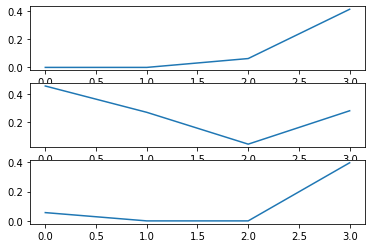

In [73]:
img1_nucleus_score = [img1_dice_scores[f][0] for f in all_filters]
img1_cytoplasm_score = [img1_dice_scores[f][1] for f in all_filters]
img1_background_score = [img1_dice_scores[f][2] for f in all_filters]

fig, axs = plt.subplots(3, 1)

axs[0].plot(range(0, 4), img1_nucleus_score)
axs[1].plot(range(0, 4), img1_cytoplasm_score)
axs[2].plot(range(0, 4), img1_background_score)
plt.show()

In [77]:
img1_means_over_components = {f:img1_dice_scores[f].mean() for f in all_filters}
img1_means_over_components

{'sato': 0.17144777151964719,
 'meijering': 0.09028662676051386,
 'frangi': 0.035808657968449446,
 'hessian': 0.363417214184629}

In [78]:
img1_dice_scores['hessian'].round(2)

array([0.41, 0.28, 0.4 ])

In [81]:
{f: mean_dice_scores[f].round(2) for f in all_filters}

{'sato': array([0.05, 0.37, 0.09]),
 'meijering': array([0.08, 0.27, 0.04]),
 'frangi': array([0.13, 0.15, 0.02]),
 'hessian': array([0.37, 0.28, 0.42])}

In [68]:
mean_means_over_components = [mean_dice_scores[i].mean() for i in range(len(mean_dice_scores))]
np.argmax(mean_means_over_components)

4

In [70]:
mean_dice_scores[3].round(2)

array([0.73, 0.59, 0.48])